In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [2]:
data = pd.read_csv('C:\Jupyter_Project/005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-28,23280.0,23360.0,22780.0,22900.0,1099.987793,15795600.0
1,2016-01-29,22800.0,23000.0,22320.0,23000.0,1104.791382,21849150.0
2,2016-02-01,23040.0,23260.0,23020.0,23260.0,1117.280273,12998950.0
3,2016-02-02,23220.0,23320.0,22940.0,23120.0,1110.555420,8317400.0
4,2016-02-03,23000.0,23040.0,22740.0,22920.0,1100.948608,8725350.0


In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [4]:
seq_len = 50
sequence_length = seq_len+1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [6]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 17s 76ms/step - loss: nan - val_loss: nan
Epoch 2/20
106/106 [==============================] - 3s 33ms/step - loss: nan - val_loss: nan
Epoch 3/20
106/106 [==============================] - 3s 32ms/step - loss: nan - val_loss: nan
Epoch 4/20
106/106 [==============================] - 3s 32ms/step - loss: nan - val_loss: nan
Epoch 5/20
106/106 [==============================] - 3s 33ms/step - loss: nan - val_loss: nan
Epoch 6/20
106/106 [==============================] - 3s 33ms/step - loss: nan - val_loss: nan
Epoch 7/20
106/106 [==============================] - 4s 34ms/step - loss: nan - val_loss: nan
Epoch 8/20
106/106 [==============================] - 4s 35ms/step - loss: nan - val_loss: nan
Epoch 9/20
106/106 [==============================] - 4s 35ms/step - loss: nan - val_loss: nan
Epoch 10/20
106/106 [==============================] - 3s 31ms/step - loss: nan - val_loss: nan
Epoch 11/20
106/106 [===========================

NameError: name 'validation_data' is not defined

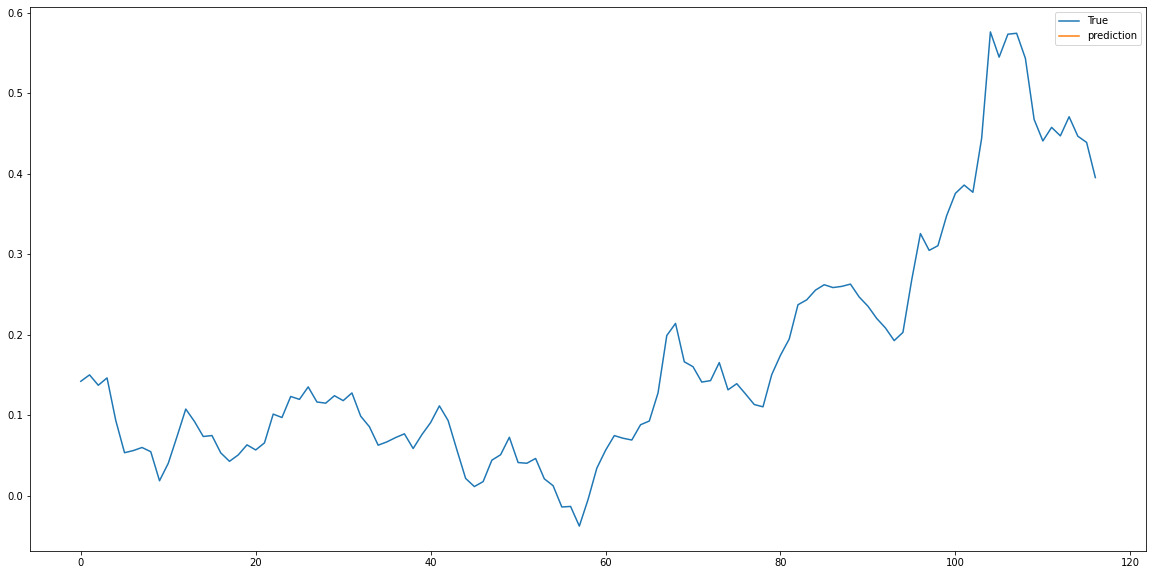

In [8]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()